# Using XGBoost Regression Example

### Goal: to make sure that xgboost model is the best for timeseries prediction

#### Overview
- Data Collection
- Data Cleaning
- Data Scaling
- Data Prepressing
- Using Pipelines to choose right model (supposedly, this will be xgboost)
- Testing different regression models using pipelines, taking best scores and sorting by best scores
- Using last choosen model

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error, r2_score

from xgboost import XGBRegressor



------------------------------------------
✅ Runtime: 48.2 ms | 💾 Mem: 237.30 MB (Δ +5.02 MB) | ⚙️ CPU: 9.1%


In [2]:
# Data loading and preprocessing
df = pd.read_csv('data/co2/korean_cities_environmental_data_fake.csv')
df.head()

,datetime,region,city,electricity_usage_kwh,traffic_volume_vehicles,industrial_output_units,temperature_celsius,humidity_percent,public_transport_passengers,population_density_per_km2,co2_emissions_ppm
0,2025-11-08 18:58:35.040324,Busan,Busanjin-gu,4971.98,1075.0,1087.85,12.86,68.7,932.0,915.0,453.41
1,2025-11-08 18:58:35.040324,Busan,Gangseo-gu,6252.59,1780.0,2851.46,9.53,69.0,2196.0,2603.0,478.55
2,2025-11-08 18:58:35.040324,Busan,Haeundae-gu,9007.39,22566.0,976.28,11.56,68.9,26638.0,8427.0,547.03
3,2025-11-08 18:58:35.040324,Busan,Saha-gu,9259.80,3322.0,1191.44,8.34,60.0,459.0,116.0,527.42
4,2025-11-08 18:58:35.040324,Busan,Suyeong-gu,2741.12,628.0,551.91,9.18,72.5,1151.0,357.0,489.98



------------------------------------------
✅ Runtime: 13.5 ms | 💾 Mem: 259.44 MB (Δ +3.41 MB) | ⚙️ CPU: 21.7%


In [3]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5840 entries, 0 to 5839
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   datetime                     5840 non-null   object 
 1   region                       5840 non-null   object 
 2   city                         5840 non-null   object 
 3   electricity_usage_kwh        5840 non-null   float64
 4   traffic_volume_vehicles      5840 non-null   float64
 5   industrial_output_units      5840 non-null   float64
 6   temperature_celsius          5840 non-null   float64
 7   humidity_percent             5840 non-null   float64
 8   public_transport_passengers  5840 non-null   float64
 9   population_density_per_km2   5840 non-null   float64
 10  co2_emissions_ppm            5840 non-null   float64
dtypes: float64(8), object(3)
memory usage: 502.0+ KB
None
       electricity_usage_kwh  traffic_volume_vehicles  \
count            5840.0

In [4]:
# data Cleaning
df = df.ffill().bfill()
df['datetime'] = pd.to_datetime(df['datetime'])


------------------------------------------
✅ Runtime: 6.8 ms | 💾 Mem: 260.72 MB (Δ +0.61 MB) | ⚙️ CPU: 0.0%


In [5]:
# Sclaing features
print(df.shape)
df_dummies = pd.get_dummies(df, columns=['region', 'city'])
print(df_dummies.shape)


df_dummies.head()

(5840, 11)
(5840, 95)


,datetime,electricity_usage_kwh,traffic_volume_vehicles,industrial_output_units,temperature_celsius,humidity_percent,public_transport_passengers,population_density_per_km2,co2_emissions_ppm,region_Busan,...,city_Suyeong-gu,city_Ulju-gun,city_Wonju,city_Yangsan,city_Yeongdeungpo-gu,city_Yeongju,city_Yeonsu-gu,city_Yeosu,city_Yongin,city_Yuseong-gu
0,2025-11-08 18:58:35.040324,4971.98,1075.0,1087.85,12.86,68.7,932.0,915.0,453.41,True,...,False,False,False,False,False,False,False,False,False,False
1,2025-11-08 18:58:35.040324,6252.59,1780.0,2851.46,9.53,69.0,2196.0,2603.0,478.55,True,...,False,False,False,False,False,False,False,False,False,False
2,2025-11-08 18:58:35.040324,9007.39,22566.0,976.28,11.56,68.9,26638.0,8427.0,547.03,True,...,False,False,False,False,False,False,False,False,False,False
3,2025-11-08 18:58:35.040324,9259.80,3322.0,1191.44,8.34,60.0,459.0,116.0,527.42,True,...,False,False,False,False,False,False,False,False,False,False
4,2025-11-08 18:58:35.040324,2741.12,628.0,551.91,9.18,72.5,1151.0,357.0,489.98,True,...,True,False,False,False,False,False,False,False,False,False



------------------------------------------
✅ Runtime: 25.1 ms | 💾 Mem: 260.97 MB (Δ +0.25 MB) | ⚙️ CPU: 0.0%


Text(0.5, 1.0, 'Correlation Heatmap')

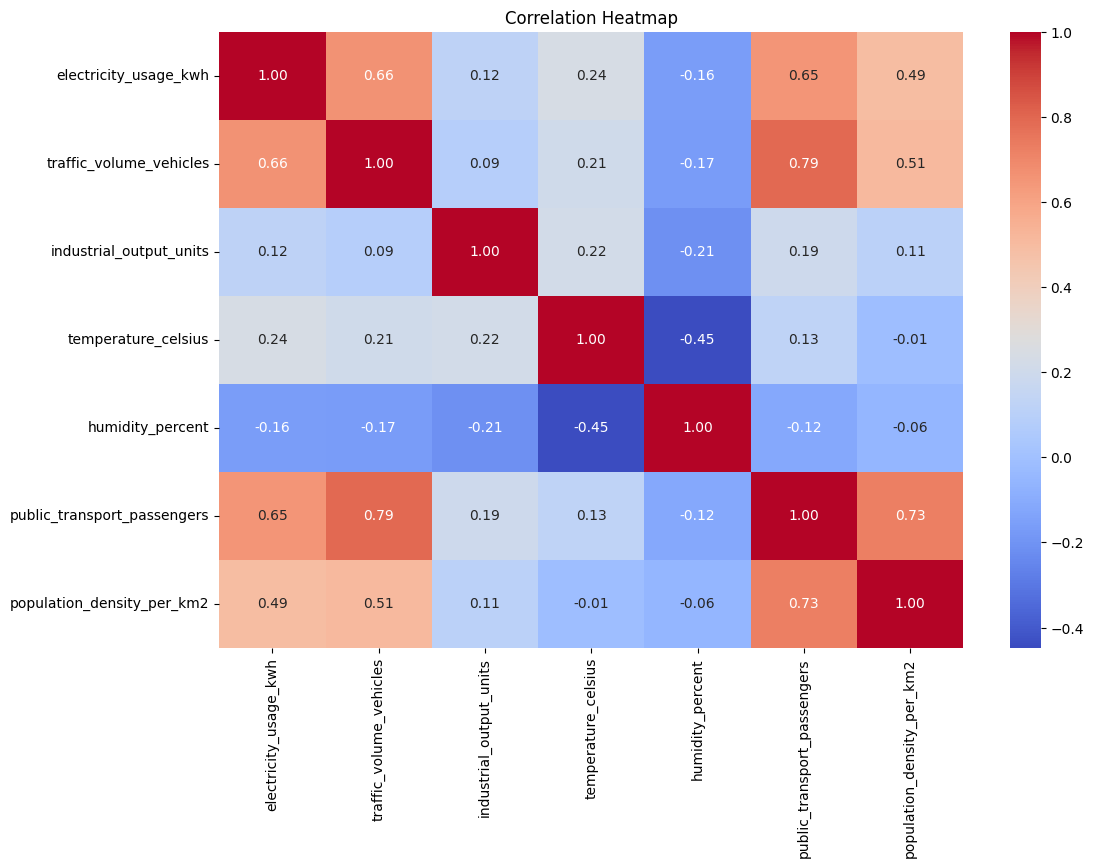


------------------------------------------
✅ Runtime: 131.5 ms | 💾 Mem: 379.33 MB (Δ +5.33 MB) | ⚙️ CPU: 10.0%


In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.drop(columns=['co2_emissions_ppm', 'datetime', 'region', 'city']).corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")

In [6]:
if 'co2_emissions_ppm' in df.columns:
    X = df_dummies.drop(['co2_emissions_ppm', 'datetime'], axis=1).values
else:
    pass

y = df_dummies['co2_emissions_ppm'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


------------------------------------------
✅ Runtime: 7.8 ms | 💾 Mem: 271.03 MB (Δ +10.06 MB) | ⚙️ CPU: 0.0%


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


model = XGBRegressor(n_estimators=600, learning_rate=0.1, max_depth=4, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)





------------------------------------------
✅ Runtime: 746.7 ms | 💾 Mem: 289.67 MB (Δ +18.64 MB) | ⚙️ CPU: 7.5%


In [8]:
rmse = root_mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("RMSE:", rmse)
print("R2:", r2)

RMSE: 6.407273221580139
R2: 0.9690680102909689

------------------------------------------
✅ Runtime: 1.3 ms | 💾 Mem: 289.67 MB (Δ +0.00 MB) | ⚙️ CPU: 14.6%


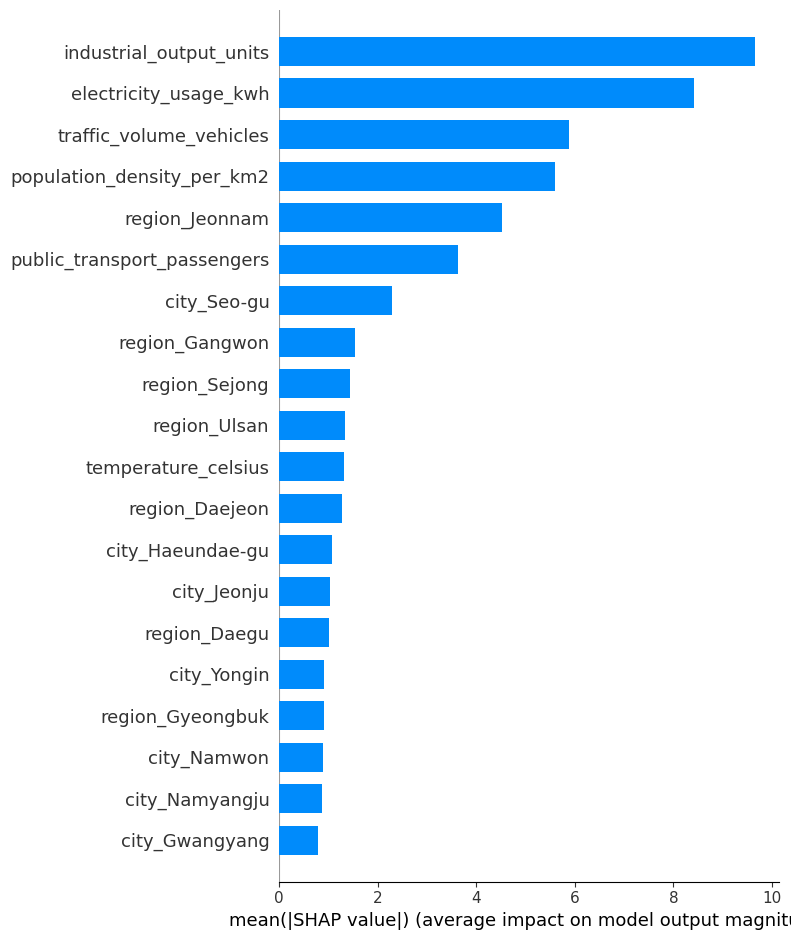


------------------------------------------
✅ Runtime: 5424.8 ms | 💾 Mem: 393.67 MB (Δ +14.28 MB) | ⚙️ CPU: 59.6%


In [18]:
explainer = shap.Explainer(model, X_train, feature_names=df_dummies.drop(['co2_emissions_ppm', 'datetime'], axis=1).columns)
shap_values = explainer(X_test)
shap.summary_plot(shap_values, X_test, plot_type="bar", title="Feature Importance")